In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer

In [2]:
epi_dir = '/Volumes/umms-esnitkin/Project_KPC_LTACH/Analysis/LTACH_transmission_modeling/data'

## Data Exploration

#### Floor Trace

In [3]:
df_floor = pd.read_csv(f"{epi_dir}/2019-12-18_floor_trace.csv", index_col=0)

In [5]:
df_floor.head()

,15509,15510,15511,15512,15513,15514,15515,15516,15517,15518,...,15866,15867,15868,15869,15870,15871,15872,15873,15874,15875
1,3,3,3,3,3,3,3,3,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
np.unique(df_floor.values) # six floors,

array([0, 1, 2, 3, 4, 5, 6])

In [9]:
np.unique(df_floor.values, return_counts=True) # almost nobody on floor five
# could be a useful illustration of how priors do or don't shift

(array([0, 1, 2, 3, 4, 5, 6]),
 array([80070,  3303,  2258,  6649,  1168,    49,  1923]))

In [34]:
n_floors = {}
for i, r in df_floor.iterrows():
    n_floors[i] = 0
    floor = 0
    for f in r.values:
        if f != floor:
            if f != 0:
                n_floors[i] += 1
                floor = f
n_floors = pd.Series(n_floors)       

In [42]:
n_floors.value_counts().sort_index().cumsum() / 260 # more than half of patients move floors twice or more during their stay

1     0.153846
2     0.480769
3     0.657692
4     0.761538
5     0.834615
6     0.896154
7     0.923077
8     0.957692
9     0.973077
10    0.980769
11    0.984615
12    0.996154
14    1.000000
Name: count, dtype: float64

In [ ]:
# TODO: validate, floor trace agrees with facility trace :(

In [56]:
ftrace.head()

,0,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,365,366
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
for t in range(367):
    set1 = set(ftrace[t][ftrace[t] > 0].index)
    set2 = set(df_floor.iloc[:, t][df_floor.iloc[:, t] > 0].index)
    if set1 != set2:
        print(t)
        problem = set1 ^ set2
        print(problem)
        print(df_ftrace.loc[list(problem)[0], t:t+2])
        print("***")
        

0
{166, 210}
0    1.5
1    0.0
2    0.0
Name: 166, dtype: float64
***
14
{18}
14    1.5
15    0.0
16    0.0
Name: 18, dtype: float64
***
126
{40}
126    1.5
127    0.0
128    0.0
Name: 40, dtype: float64
***
140
{240}
140    1.5
141    0.0
142    0.0
Name: 240, dtype: float64
***
195
{189}
195    1.25
196    0.00
197    0.00
Name: 189, dtype: float64
***


In [126]:
((ftrace.values > 0) != (df_floor.values > 0)).sum()

6

#### Room Trace

In [6]:
df_room = pd.read_csv(f"{epi_dir}/2019-12-18_room_trace.csv", index_col=0)

In [46]:
np.unique(df_room.values) # 95 possible rooms!

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

In [50]:
np.unique(df_room.values, return_counts=True)[1][1:]

array([225, 214, 138, 153, 209, 172, 177, 251, 348,  47, 396, 168,  87,
       252, 135, 438,  97, 164,  49, 151, 295, 134, 186, 420, 296, 121,
        66,  66, 238,  59,  35, 393, 287, 408, 269, 300,  73,  35, 195,
        84,  76, 103, 341,  44, 277,  95,  70, 159, 384,  98, 354, 189,
       164, 190,  85,  47, 106, 289, 325,  98, 273, 411, 140, 162, 181,
        97,  79, 145, 474,  59,  99, 129, 159, 276,  97, 126,  98, 143,
        65, 150,  39, 101,  76,  28,  58,  71,  75,   2,  33,  33,  58,
        56,   6,   1,  25])

#### question: how many people share rooms, anyway?

# Data Preprocessing

In [51]:
# facility trace
df_ftrace = pd.read_csv(f"{epi_dir}/2019-12-18_facility_trace.csv", index_col=0)
df_ftrace.columns = np.arange(367)

# recover facility trace
ftrace = (df_ftrace > 0).astype(int)

# recover infections
# how does this handle people who are 
infections = df_ftrace.replace(1, np.nan).ffill(axis=1)
infections = infections.replace({0:np.nan, 1.25:0, 1.5:1})

106


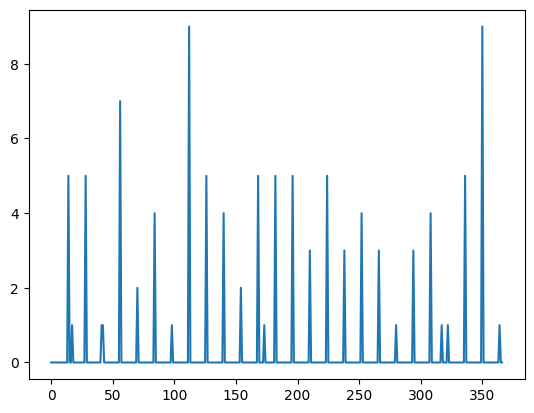

In [5]:
# how many infection events occur after admission?
new_infections = (infections.diff(axis=1) == 1).astype(int).sum(0)
print(new_infections.sum())
sns.lineplot(new_infections)
plt.show()

In [6]:
# how many infections happen upon admission?
# infections

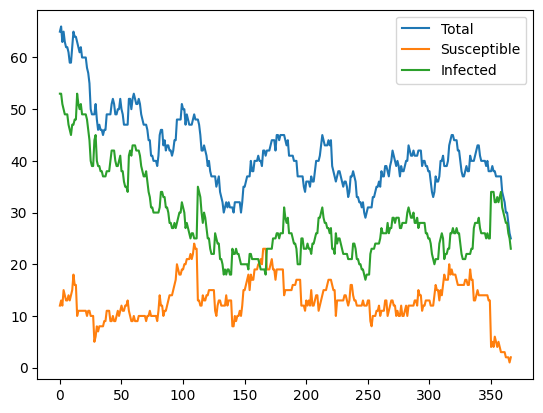

In [7]:
I = infections.sum(0)
Nt = ftrace.sum(0)
S = Nt - I
sns.lineplot(Nt, label="Total")
sns.lineplot(S, label="Susceptible")
sns.lineplot(I, label="Infected")
plt.show()

In [8]:
# deal with: people who get infected twice!
# are there many?
# new goal: assume someone can't recover during a stay
# but they may leave and come back recovered (?)
infections_cleaned = infections.copy()
doubles = set()
for i, row in infections_cleaned.iterrows():
    infected = False
    for j, v in row.items():
        if infected:
            if v == 0:
                doubles.add(i)
                row[j] = 1
        if v == 1:
            infected = True
        if np.isnan(v):
            infected = False

print(list(doubles))

[162, 295, 13, 155, 92]


In [9]:
n_visits = {}
for i, row in infections_cleaned.iterrows():
    admitted = False
    z = 0
    for _, v in row.items():
        if not np.isnan(v) and not admitted:
            admitted = True
            z += 1
        if np.isnan(v):
            admitted = False
    n_visits[i] = z
n_visits = pd.Series(n_visits)

In [10]:
n_visits.value_counts() / len(n_visits)

1    0.723077
2    0.184615
3    0.057692
4    0.026923
5    0.007692
Name: count, dtype: float64

In [11]:
n_visits.sum()

367

One possible issue: the data makes it seem like we start off with an unusually high number of infections. Maybe we can ameliorate this by starting 100 days into the year...seems easier than modeling a time-varying pre-admitted colonization rate

Or, we hardcode initial infections (back to the original plan)

### Understanding precolonization

In [12]:
# multiple visits
first_test = {}
i = 0
for _, r in df_ftrace.reset_index(drop=True).iterrows():
    entry_time = 0
    entered = False
    recorded = False
    for j, v in r.items():
        if v > 0 and not entered:
            entry_time = j
            entered = True
        if entered and v == 0:
            i += 1
            entered = False
            recorded = False
        if v > 1 and not recorded:
            first_test[i] = j - entry_time
            recorded = True
    if entered:
        i += 1
first_test = pd.Series(first_test)      

In [13]:
first_test.value_counts() / 367

0     0.534060
1     0.392371
2     0.024523
3     0.010899
13    0.005450
4     0.005450
5     0.005450
11    0.005450
14    0.002725
7     0.002725
22    0.002725
28    0.002725
8     0.002725
12    0.002725
Name: count, dtype: float64

build dataframe of colonizations upon arrival

what i'll do--if someone gets tested within 3 days of arrival (95% of first tests)

In [14]:
df_precol = pd.DataFrame(index=df_ftrace.index, columns=df_ftrace.columns)
for n, r in df_ftrace.iterrows():
    entry_time = 0
    entered = False
    recorded = False
    for t, v in r.items():
        if v > 0 and not entered:
            entry_time = t
            entered = True
        if entered and v == 0:
            entered = False
            recorded = False
        if v > 1 and not recorded:
            test_time = t - entry_time
            if test_time < 3:
                # df_precol.loc[n,t] = v
                df_precol.loc[n, entry_time] = v
            # else:
            #     df_precol.loc[n,t] = 
            recorded = True
df_precol.replace({1.5:1, 1.25:0}, inplace=True)

In [15]:
df_precol.count().sum()

349

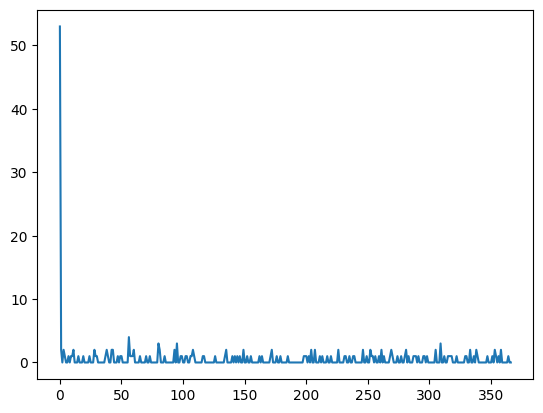

In [28]:
screened_infected = (df_precol).sum(0)
sns.lineplot(screened_infected)
plt.show()

## Simulator II: Fixed Precolonization

In [17]:
def crkp_simulator2(logbeta, seed):
    np.random.seed(seed)
    N, T = ftrace.shape
    beta = np.exp(logbeta)
    
    W = ftrace.values
    # old admitted status
    w = np.zeros(N)
    
    X = np.empty((N, T))
    # old infection status
    x = np.empty(N)
    # x[:] = np.nan # should this be all zeros (negatives) by default?
    x[:] = 0
    
    I = np.zeros(N)
    0
    for t in range(T):
        # case 1: not present
        # if absent, set to nan
        # otherwise, inherit old status
        X[:, t] = np.where(1 - W[:, t], np.nan, x)
        # case 2: new arrival
        newly_admitted = W[:, t] * (1 - w)
        # if newly admitted, load test data if available, otherwise default to last status
        # will this under-report? if someone gets tested a day after arrival
        X[:, t] = np.where(newly_admitted, df_precol[t], X[:, t])
        # ALTERNATIVELY
        # inherit infection statuses from ground truth
        # case 3: already admitted and susceptible
        # randomly model transmission event
        # otherwise, inherit old status
        staying = W[:, t] * w
        hazard = I.sum() * beta * np.ones(N)
        p = 1 - np.exp(-hazard / N) # not the end of the world to normalize by size of population
        X[:, t] = np.where(staying * (1 - I), np.random.binomial(1, p, N), X[:, t])
        x = X[:, t]
        w = W[:, t]
        I = (x == 1).astype(int)

    return np.nansum(X, axis=0) / N

In [19]:
N = 260
precols = crkp_simulator2(-6, 1) * N

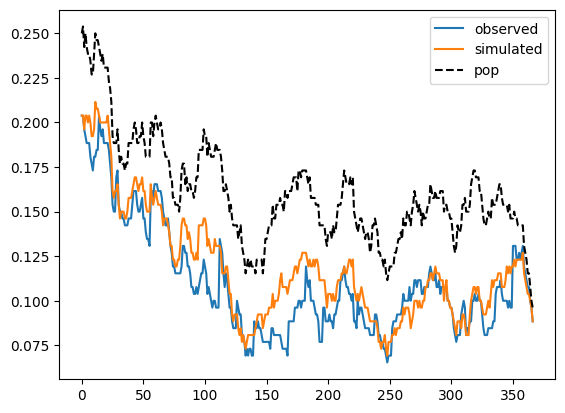

In [25]:
I_rep = crkp_simulator2(-1.8, 1)

sns.lineplot(I / 260, label="observed")
sns.lineplot(I_rep, label="simulated")
sns.lineplot(ftrace.sum() / 260, color="k", linestyle="--", label="pop")
plt.show()

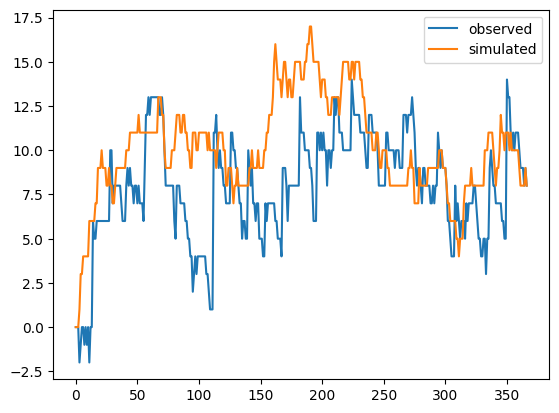

In [26]:
sns.lineplot((I - precols), label="observed")
sns.lineplot(I_rep * 260 - precols, label="simulated")
# sns.lineplot(ftrace.sum() / 260, color="k", linestyle="--", label="pop")
plt.show()

## ABC First Pass

In [26]:
def accept_sample(x, x_o, epsilon, summarize):
    # error should have dimension (d_theta, d_x)
    # if summarize:
    #     x_o = x_o[:, 0]
    # w = 1 if len(x_o) > 1 else None
    v = np.array(x - x_o)
    # TODO: introduce scaling
    error = np.linalg.norm(v)
    # if not summarize:
    #     error = error.mean(w)
    accept = (error < epsilon)
    # if accept.dim() > 0:
    #     accept = accept.min()
    return accept, error

In [27]:
def abc_rejection_sampler(S, epsilon, prior_sampler, simulator, 
                          x_o, max_attempts=10000, summarize=False):
    # S: total number of particles
    samples = []
    attempts = 0
    # x_o = x_o.transpose(0,1)
    # x_o is shape (d_theta, d_x)
    errors = np.full(max_attempts, -1e3)
    start_time = timer()
    for s in range(S):
        accept = False
        while not accept:
            theta = prior_sampler()
            x = simulator(theta, seed=attempts)
            accept, error = accept_sample(x, x_o, epsilon, summarize)
            if accept:
                samples.append(theta)
            errors[attempts] = error
            attempts += 1
            if attempts == max_attempts:
                print("Maximum attempts reached, halting")
                return np.array(samples), errors
            if not attempts % 1000:
                print(f"Attempts: {attempts:,}")
    end_time = timer()
    accept_rate = S / attempts
    
    print(f"Time lapsed: {end_time - start_time:.2f} seconds")
    print(f"With tolerance {epsilon}, acceptance rate: {accept_rate:.6f}")
    print(f"Total number of attempts: {attempts:,}")
    return np.array(samples), errors

In [28]:
# set a normal prior of (-3, 1) on beta
def prior_sampler():
    return np.random.normal(-2, 1)

In [57]:
N, T = ftrace.shape
x_o = infections_cleaned.sum(0) / N

S = 100
eps = .25

posterior_sample, errors = abc_rejection_sampler(
    S, eps, prior_sampler, crkp_simulator2, x_o, max_attempts=100000,
    summarize=False
    )

Attempts: 1,000
Attempts: 2,000
Attempts: 3,000
Time lapsed: 33.97 seconds
With tolerance 0.25, acceptance rate: 0.028902
Total number of attempts: 3,460


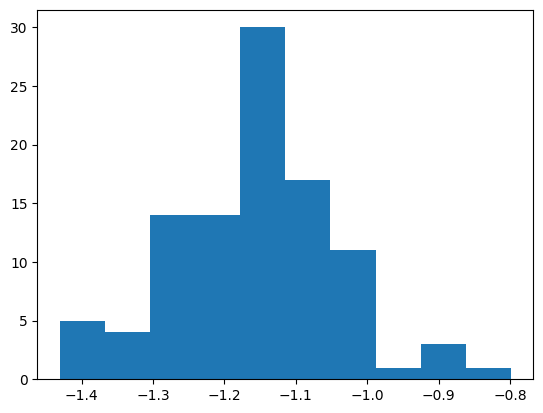

In [59]:
plt.hist(posterior_sample)
plt.show()

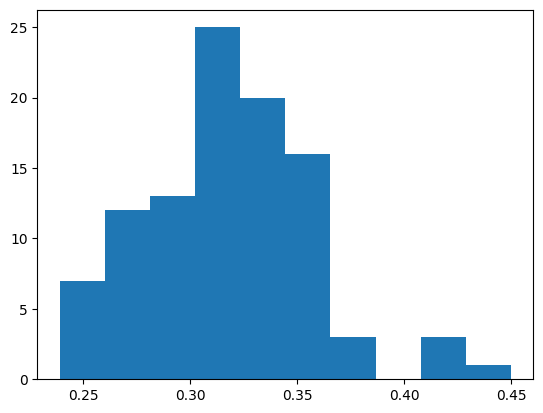

In [58]:
plt.hist(np.exp(posterior_sample))
plt.show()

#### posterior predictive check

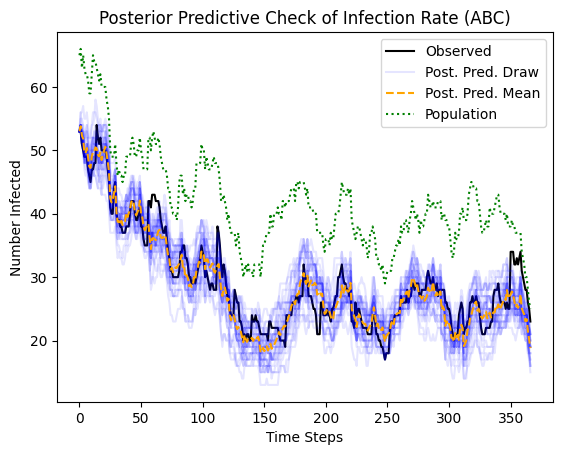

In [95]:
K = 30
Nt = ftrace.sum().values
posterior_predictive_abc = np.empty((K, T))
for i in range(30):
    beta = posterior_sample[i]
    x_rep = crkp_simulator2(beta, i)
    posterior_predictive_abc[i] =  np.array(x_rep) * N
pp_mean_abc = posterior_predictive_abc.mean(0)

labels = ["Post. Pred. Draw"] + [None for _ in range(K-1)]
I_o = x_o * N
plt.plot(I_o, label="Observed", color="k")
plt.plot(posterior_predictive_abc.T, 
         label=labels, color="b",
         alpha=0.1)
plt.plot(pp_mean_abc, label="Post. Pred. Mean", linestyle="--",
         color="orange")
plt.plot(Nt, label="Population", color="g", linestyle=":")
plt.legend()
plt.title("Posterior Predictive Check of Infection Rate (ABC)")
plt.ylabel("Number Infected")
plt.xlabel("Time Steps")
plt.show()

#### View II: Novel Infections Only

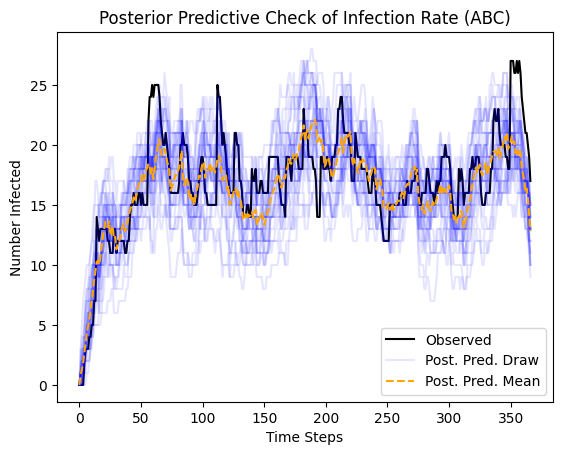

In [100]:
K = 30
Nt = ftrace.sum().values
posterior_predictive_abc = np.empty((K, T))
for i in range(30):
    beta = posterior_sample[i]
    x_rep = crkp_simulator2(beta, i)
    posterior_predictive_abc[i] =  np.array(x_rep) * N - precols
pp_mean_abc = posterior_predictive_abc.mean(0)

labels = ["Post. Pred. Draw"] + [None for _ in range(K-1)]
I_o = x_o * N - precols
plt.plot(I_o, label="Observed", color="k")
plt.plot(posterior_predictive_abc.T, 
         label=labels, color="b",
         alpha=0.1)
plt.plot(pp_mean_abc, label="Post. Pred. Mean", linestyle="--",
         color="orange")
plt.legend()
plt.title("Posterior Predictive Check of Infection Rate (ABC)")
plt.ylabel("Number Infected")
plt.xlabel("Time Steps")
plt.show()

#### View 3: Proportion Infected Over Time

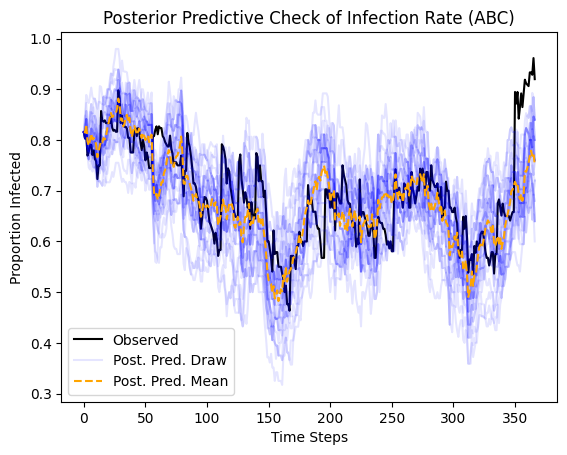

In [61]:
K = 30
Nt = ftrace.sum().values
posterior_predictive_abc = np.empty((K, T))
for i in range(30):
    beta = posterior_sample[i]
    x_rep = crkp_simulator2(beta, i)
    posterior_predictive_abc[i] =  np.array(x_rep) * N / Nt
pp_mean_abc = posterior_predictive_abc.mean(0)

labels = ["Post. Pred. Draw"] + [None for _ in range(K-1)]
I_o = x_o * N / Nt
plt.plot(I_o, label="Observed", color="k")
plt.plot(posterior_predictive_abc.T, 
         label=labels, color="b",
         alpha=0.1)
plt.plot(pp_mean_abc, label="Post. Pred. Mean", linestyle="--",
         color="orange")
# plt.plot(Nt, label="Population", color="g", linestyle=":")
plt.legend()
plt.title("Posterior Predictive Check of Infection Rate (ABC)")
plt.ylabel("Proportion Infected")
plt.xlabel("Time Steps")
plt.show()

In [62]:
## third check: comparing number of new infections...